In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

Let's start reading the file and printing the shape attribute:

In [2]:
data = pd.read_csv('data/raw/data.csv')
data.shape

(16880, 21)

For a better EDA, its important to identify which features are categorical and which ones are numerical:

In [3]:
data.head(10).T

,0,1,2,3,4,5,6,7,8,9
A,0,0,0,9,0,1,10,0,0,0
B,10,10,7,16,8,12,18,10,14,16
C,50257.0,29014.0,92.0,50269.0,8180.0,1141.0,4560.0,38.0,3790.0,23210.0
D,0,0,0,0,0,0,0,0,0,0
E,0,0,1,0,0,0,0,0,0,0
F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
G,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
H,0,0,0,0,0,0,0,0,0,0
I,0,0,1,0,0,0,0,0,0,0
J,UY,UY,UY,UY,UY,UY,UY,UY,UY,UY


Until this moment we can say the next:

- Target: Fraude
- Features:
    - Categorical: J
    - Numerical: C, F, G, Q, R, S, Monto

The other columns, we need to explore deeper so we can know if its something numerical or categories using numbers.

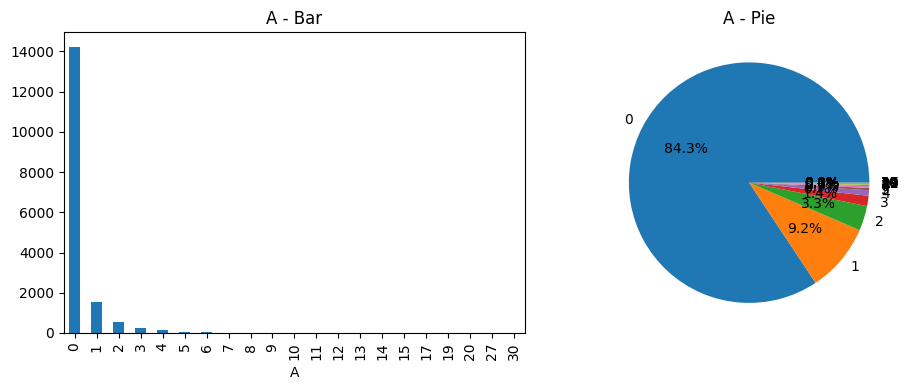

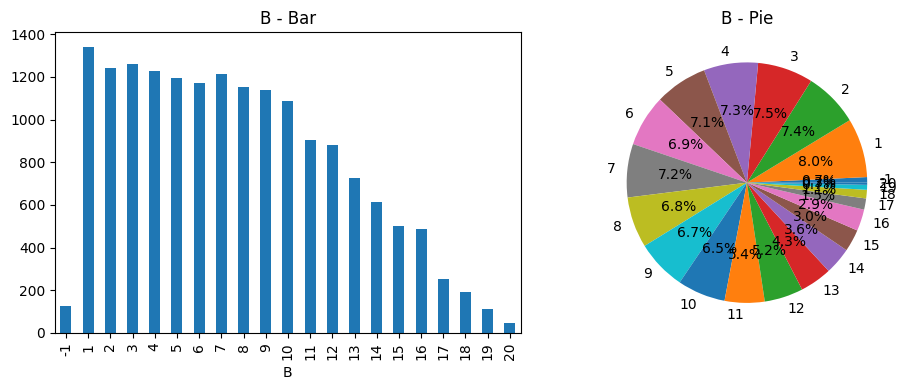

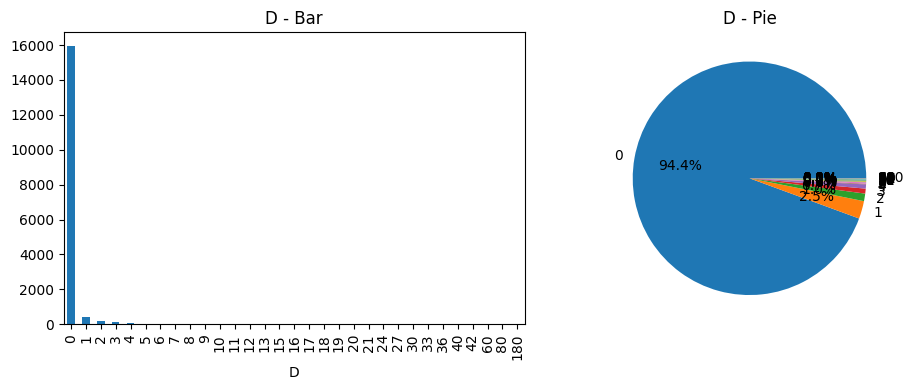

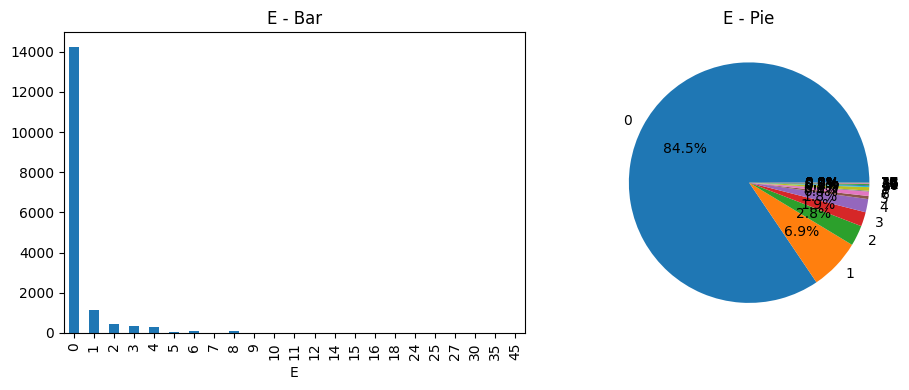

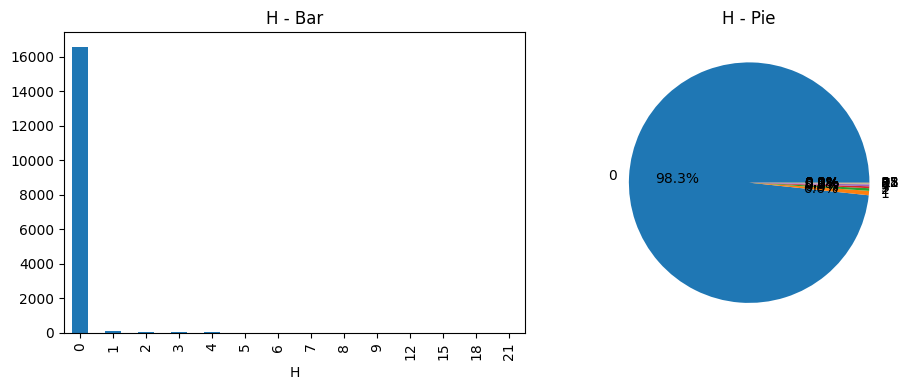

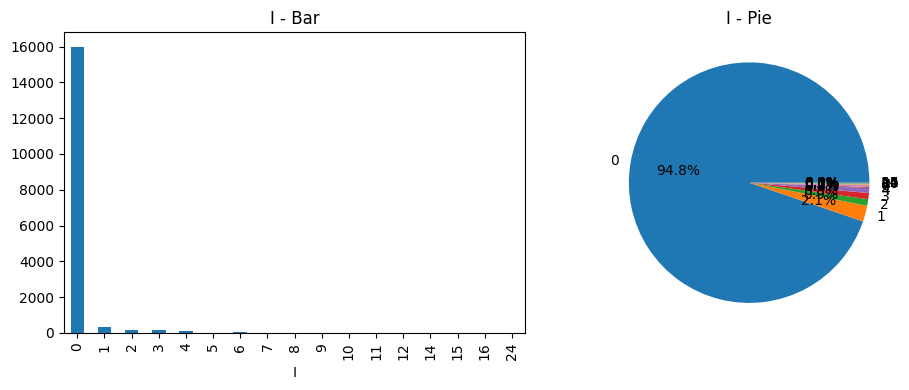

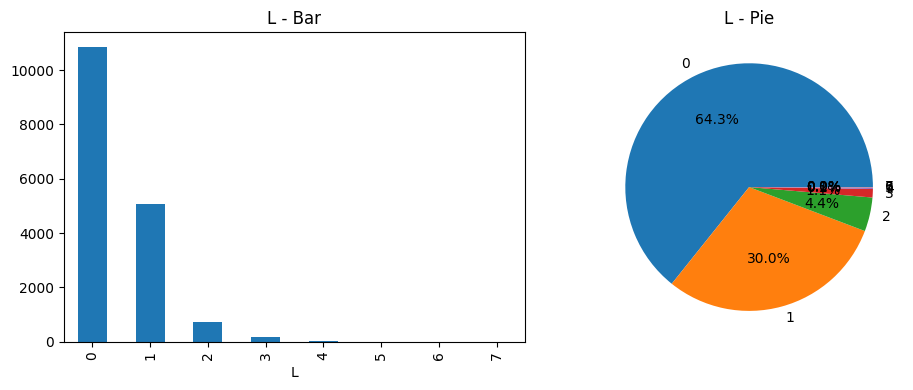

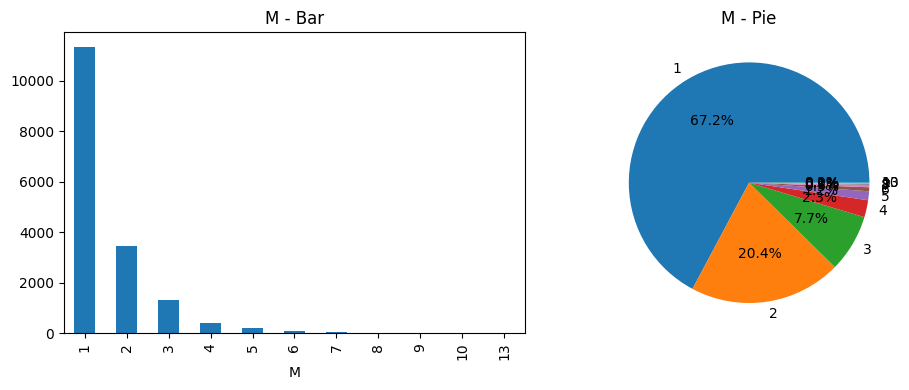

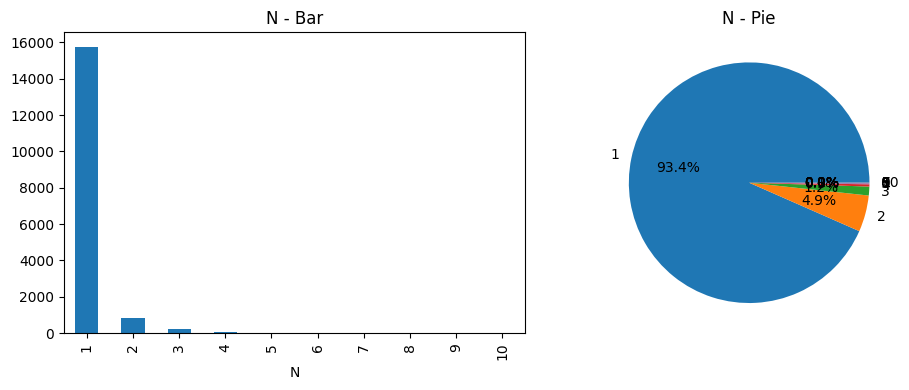

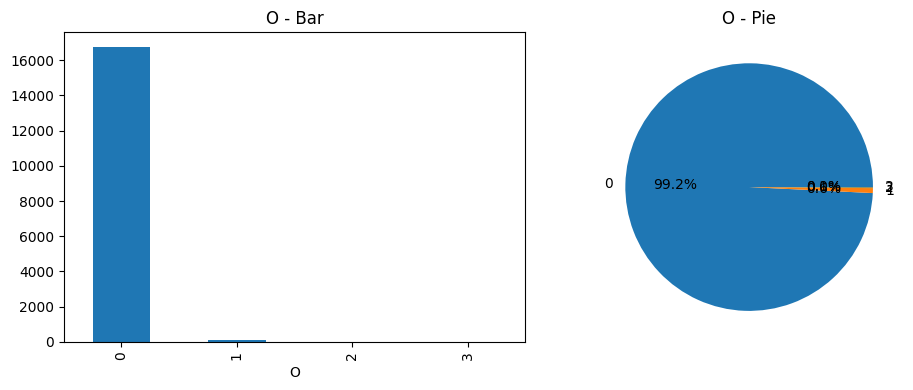

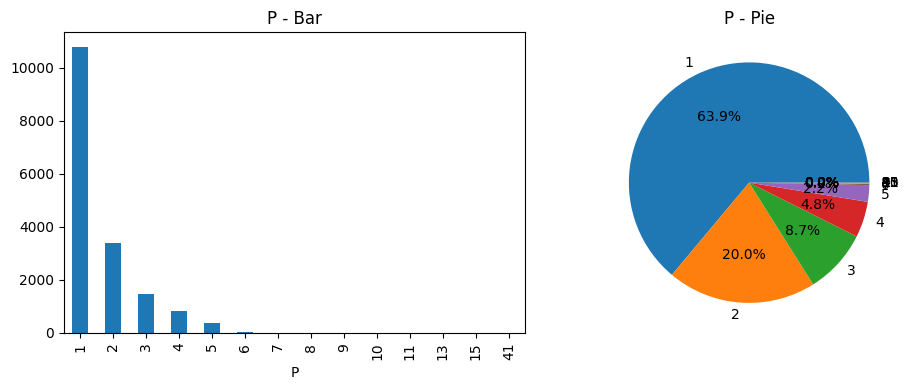

In [4]:
for col in ['A', 'B', 'D', 'E', 'H', 'I', 'L', 'M', 'N', 'O', 'P']:
    counts = data[col].value_counts().sort_index()
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    counts.plot.bar(ax=axes[0])
    axes[0].set_title(f"{col} - Bar")
    counts.plot.pie(ax=axes[1], autopct="%1.1f%%")
    axes[1].set_ylabel("")
    axes[1].set_title(f"{col} - Pie")
    plt.tight_layout()
    plt.show()


Maybe some of this columns are categorial but looking at the distribution and the numbers it looks more like numerical data. 

One insight until this moment is that maybe we can remove some of this columns, there is only one value that has the most part of the data, but it could be a better decision after we have a look up for this variables with every class of the target variable.

Now it would be a good thing to know the amount of null values per column:

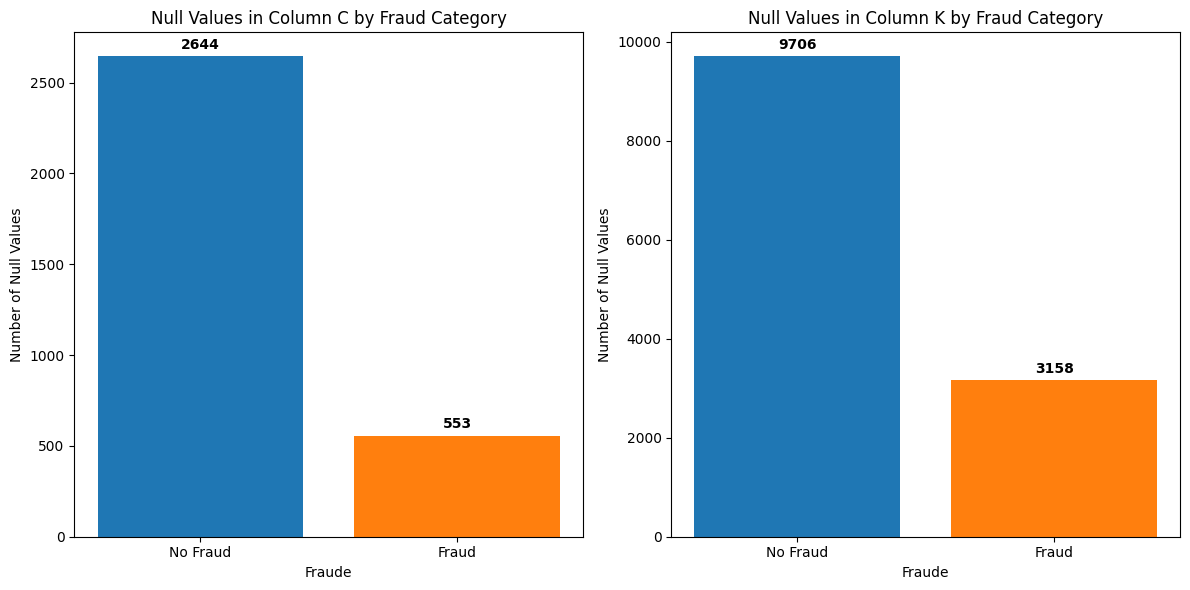

Null values distribution by Fraud category:

Column C (3197 null values):
  No Fraud: 2644 (82.7%)
  Fraud: 553 (17.3%)

Column K (12864 null values):
  No Fraud: 9706 (75.5%)
  Fraud: 3158 (24.5%)


In [6]:
null_data = data[['C', 'K', 'Fraude']].copy()

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

for i, col in enumerate(['C', 'K']):
    null_mask = null_data[col].isnull()
    fraud_counts = null_data[null_mask]['Fraude'].value_counts().sort_index()
    
    colors = ['#ff7f0e' if x == 1 else '#1f77b4' for x in fraud_counts.index]
    bars = axes[i].bar(fraud_counts.index, fraud_counts.values, color=colors)
    
    axes[i].set_title(f'Null Values in Column {col} by Fraud Category')
    axes[i].set_xlabel('Fraude')
    axes[i].set_ylabel('Number of Null Values')
    axes[i].set_xticks([0, 1])
    axes[i].set_xticklabels(['No Fraud', 'Fraud'])
    
    for j, (category, count) in enumerate(fraud_counts.items()):
        axes[i].text(j, count + max(fraud_counts.values) * 0.01, 
                    str(count), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Print summary statistics
print("Null values distribution by Fraud category:")
for col in ['C', 'K']:
    null_mask = data[col].isnull()
    fraud_dist = data[null_mask]['Fraude'].value_counts().sort_index()
    total_nulls = fraud_dist.sum()
    print(f"\nColumn {col} ({total_nulls} null values):")
    for fraud_val, count in fraud_dist.items():
        percentage = (count / total_nulls) * 100
        fraud_label = "Fraud" if fraud_val == 1 else "No Fraud"
        print(f"  {fraud_label}: {count} ({percentage:.1f}%)")

In [7]:
data[data.C.isnull()].Fraude.value_counts()/data.Fraude.value_counts()

Fraude
0    0.215502
1    0.119931
Name: count, dtype: float64

In [8]:
data[data.K.isnull()].Fraude.value_counts()/data.Fraude.value_counts()

Fraude
0    0.791100
1    0.684884
Name: count, dtype: float64

The feature 'K' will be deleted for the ML process, it has a lot of null values. The 'C' feature doesn't has too much null values as the other feature but normally more than 5-7% to impute it's alot, so it will be removed too.

Let's continue exploring the other features:

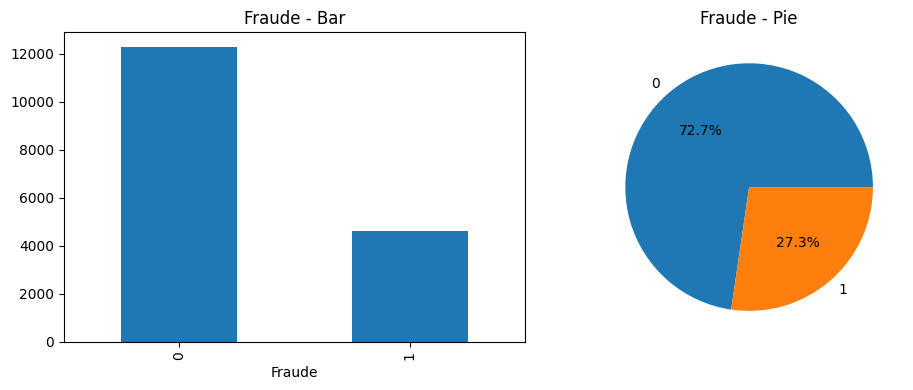

In [8]:
# data.Fraude.value_counts()
counts = data['Fraude'].value_counts().sort_index()
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
counts.plot.bar(ax=axes[0])
axes[0].set_title(f"{'Fraude'} - Bar")
counts.plot.pie(ax=axes[1], autopct="%1.1f%%")
axes[1].set_ylabel("")
axes[1].set_title(f"{'Fraude'} - Pie")
plt.tight_layout()
plt.show()

Clearly we have an unbalanced target column, later we need to fix that before the training of the models.

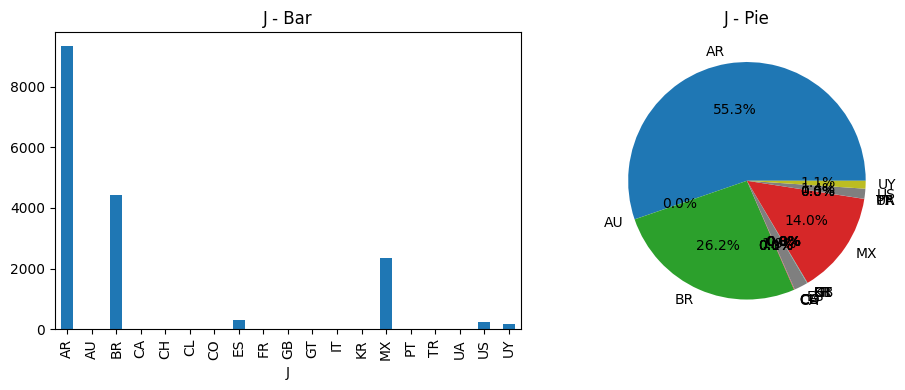

In [10]:
counts = data['J'].value_counts().sort_index()
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
counts.plot.bar(ax=axes[0])
axes[0].set_title(f"{'J'} - Bar")
counts.plot.pie(ax=axes[1], autopct="%1.1f%%")
axes[1].set_ylabel("")
axes[1].set_title(f"{'J'} - Pie")
plt.tight_layout()
plt.show()

Instead of have multiple categories, we can create a new one that contains the categories with less than 5% of the data.

The problem definition says that the numeric values can have commas and dots, so let's fix this:

In [11]:
data.dtypes

A           int64
B           int64
C         float64
D           int64
E           int64
F         float64
G         float64
H           int64
I           int64
J          object
K         float64
L           int64
M           int64
N           int64
O           int64
P           int64
Q          object
R          object
S         float64
Monto      object
Fraude      int64
dtype: object

It seems like only Q, R and Monto have this problem

In [12]:
for col in ['Q','R','Monto']:
    data[col] = data[col].str.replace(",","").astype(float)

In [13]:
data[['Q','R','Monto']].dtypes

Q        float64
R        float64
Monto    float64
dtype: object

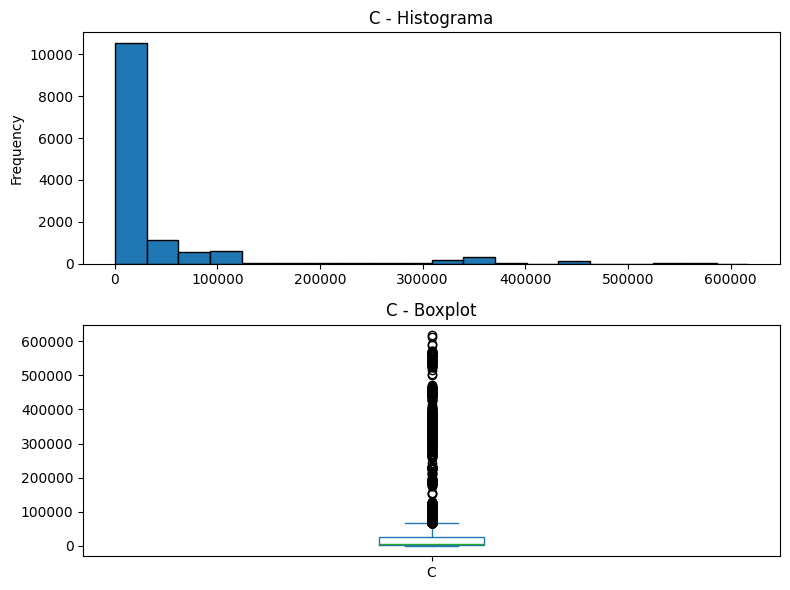

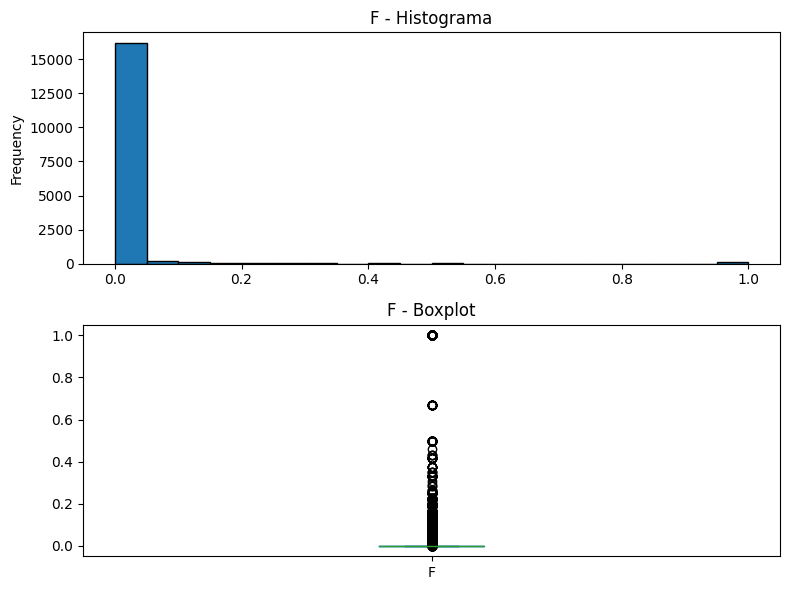

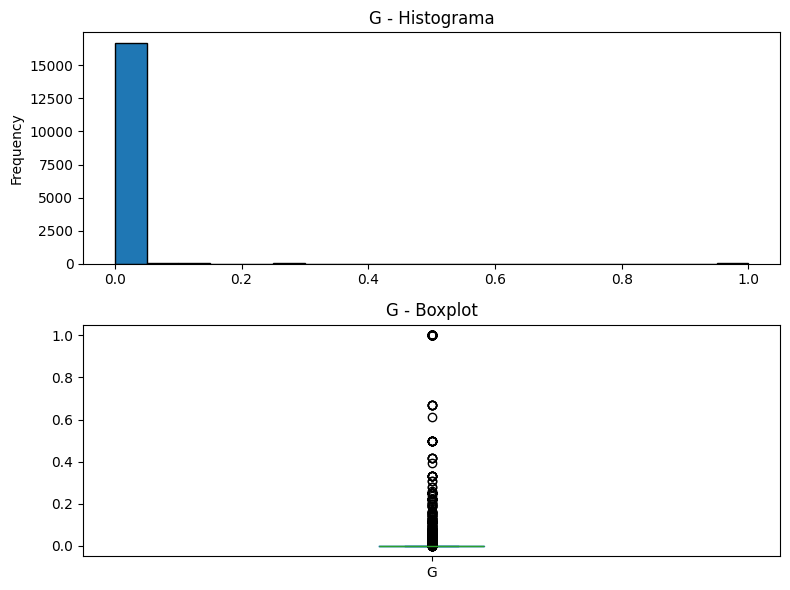

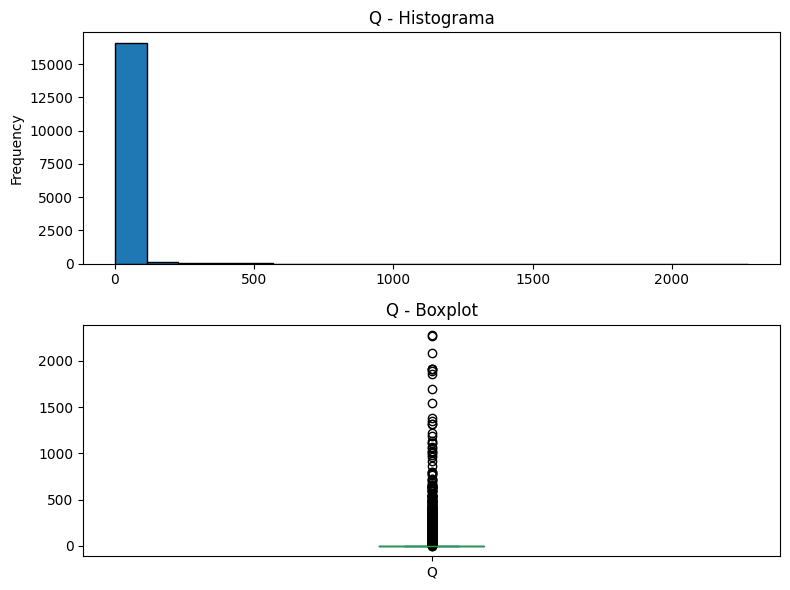

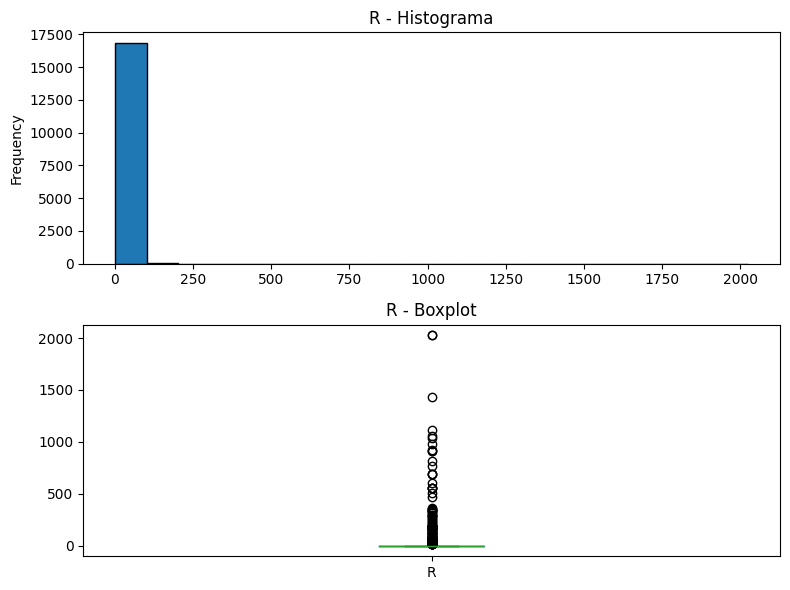

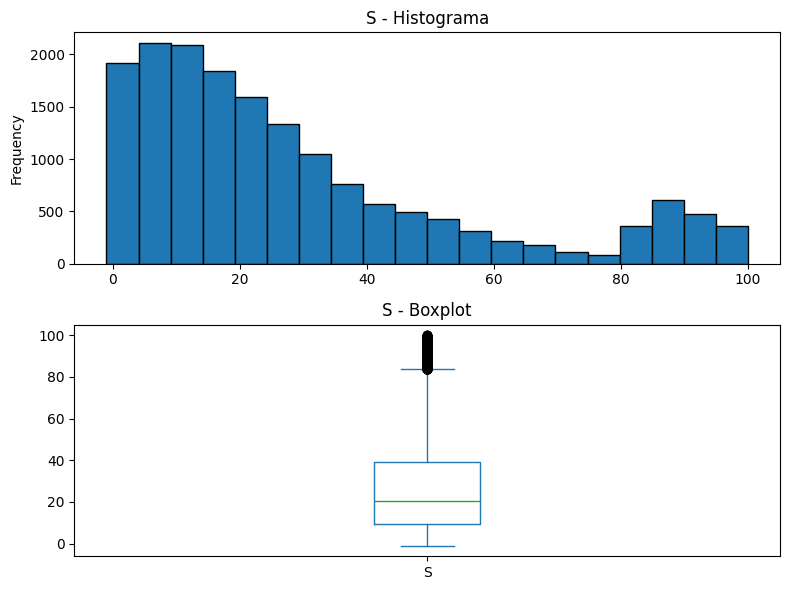

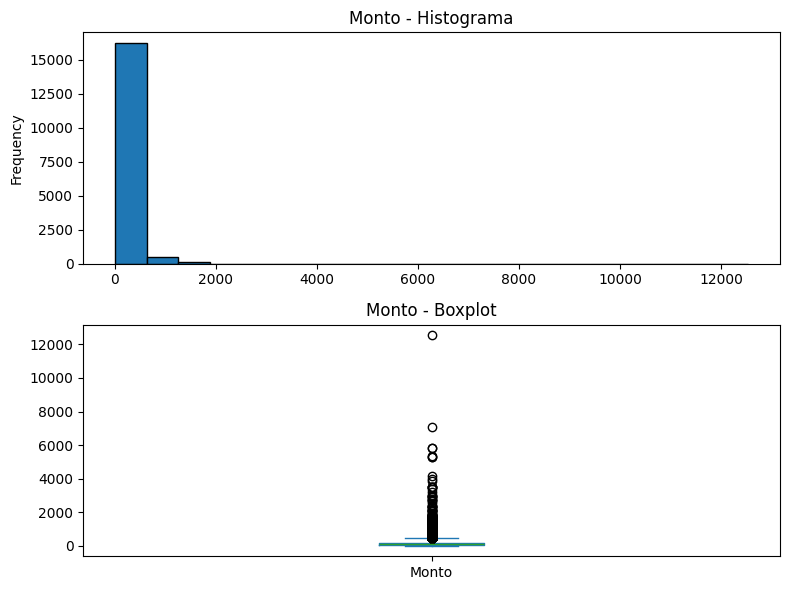

In [14]:
for col in ['C', 'F', 'G', 'Q', 'R', 'S', 'Monto']:
    fig, axes = plt.subplots(2, 1, figsize=(8, 6))
    data[col].plot.hist(ax=axes[0], bins=20, edgecolor="black")
    axes[0].set_title(f"{col} - Histograma")
    data[col].plot.box(ax=axes[1])
    axes[1].set_title(f"{col} - Boxplot")
    plt.tight_layout()
    plt.show()

A lot of outliers, maybe we need to handle this later using models and metrics that are robust for this kind of situations.

So with this we can finish(for the moment) the univariate analysis, let's move to bivariant analysis:

In [15]:
corr = data.drop(columns=['Fraude','J']).corr()
for threshold in np.arange(0, 1.1, 0.1):
    mask = np.triu(np.ones(corr.shape), k=1).astype(bool)
    filtered = corr.where(mask)
    result = (filtered.abs() >= threshold).sum().sum()
    print(f"For threshold: {threshold:.1f} - Result: {result}")

For threshold: 0.0 - Result: 171
For threshold: 0.1 - Result: 28
For threshold: 0.2 - Result: 11
For threshold: 0.3 - Result: 8
For threshold: 0.4 - Result: 5
For threshold: 0.5 - Result: 2
For threshold: 0.6 - Result: 2
For threshold: 0.7 - Result: 0
For threshold: 0.8 - Result: 0
For threshold: 0.9 - Result: 0
For threshold: 1.0 - Result: 0


There are only two pairs that are more than 0.6 correlated, so until now we don't identify high correlation between features.

In [16]:
threshold = 0.6
pairs = (
    filtered.stack()
    .reset_index()
)
pairs.columns = ["Var1", "Var2", "Correlation"]
pairs[pairs["Correlation"].abs() >= threshold]

,Var1,Var2,Correlation
25,B,K,-0.65975
69,E,I,0.66615


Now, let's see the distribution by class:

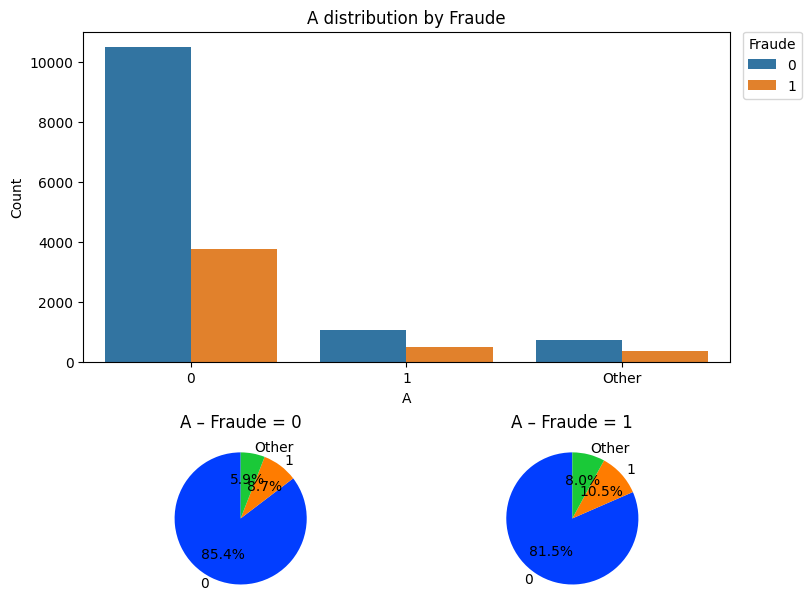

/tmp/ipykernel_21156/3823209927.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_bar.set_xticklabels(ax_bar.get_xticklabels(), rotation=45, ha='right')


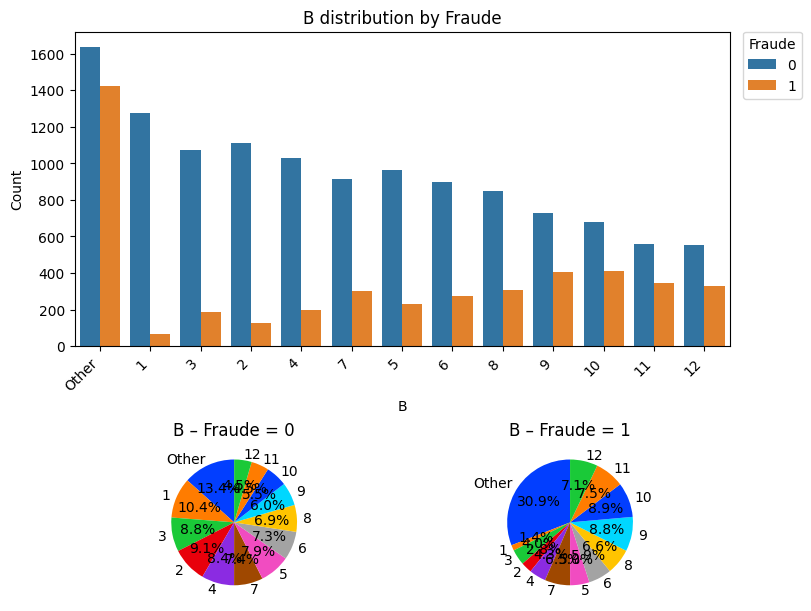

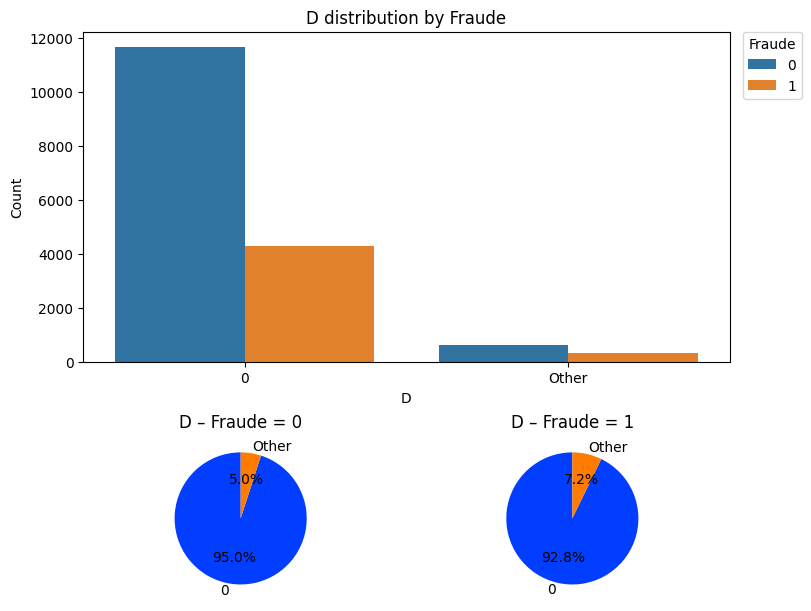

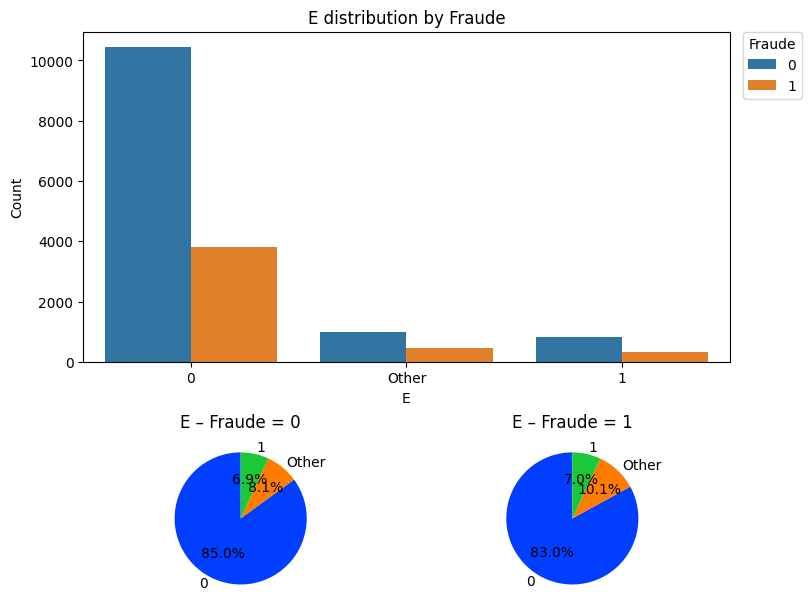

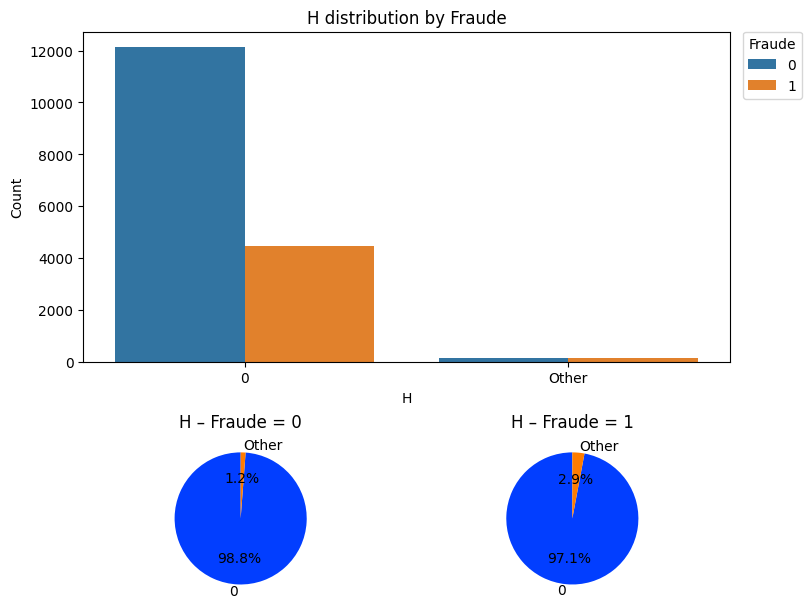

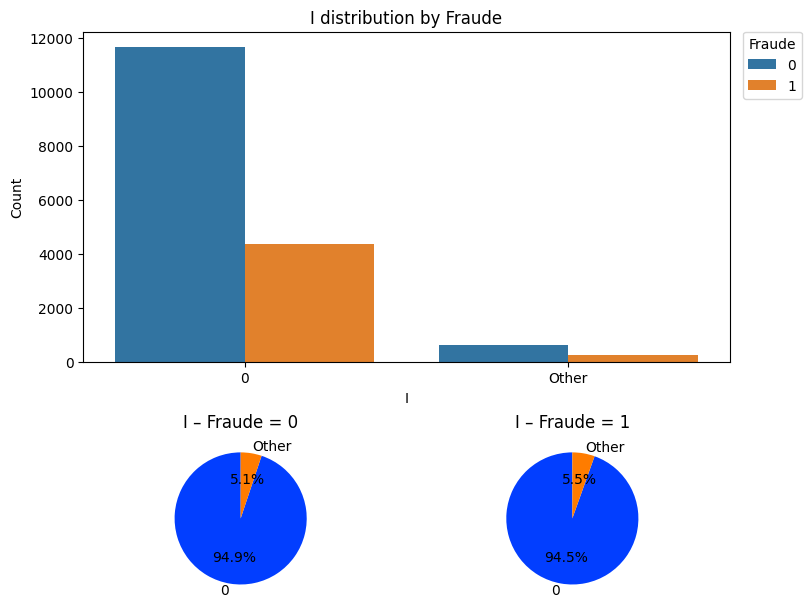

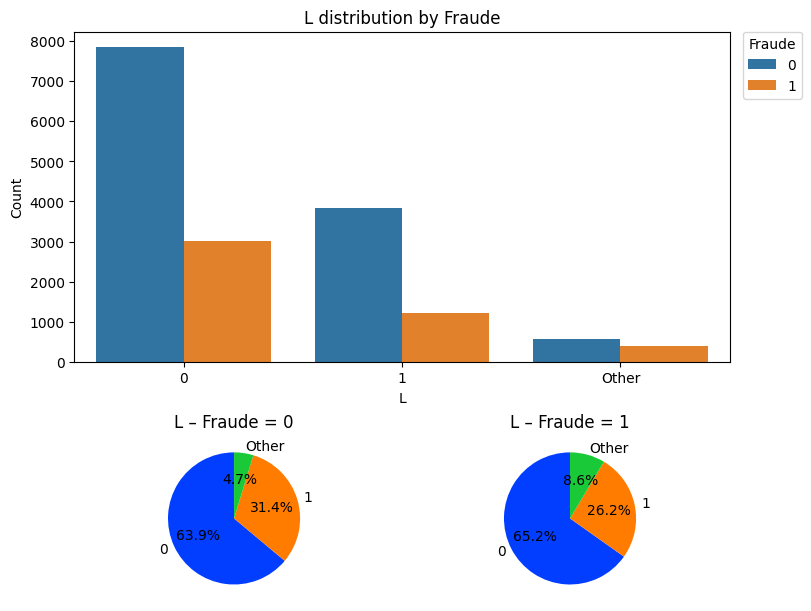

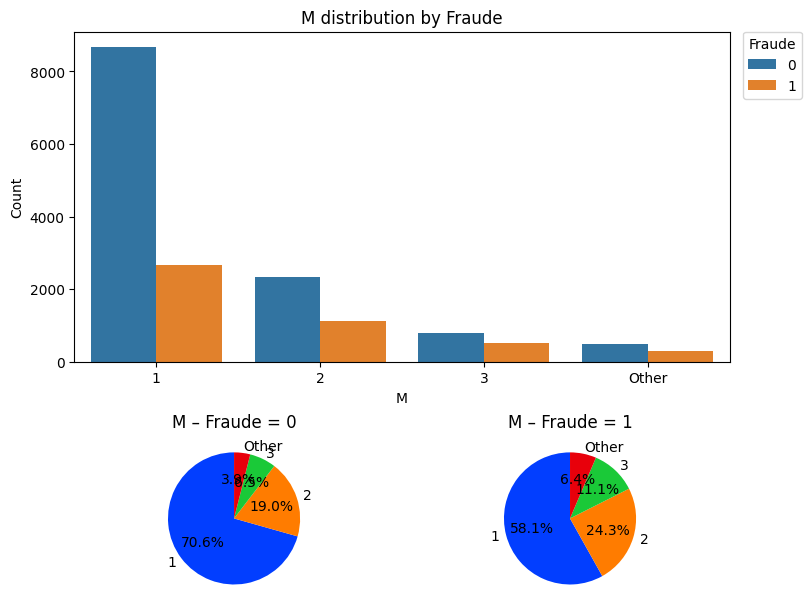

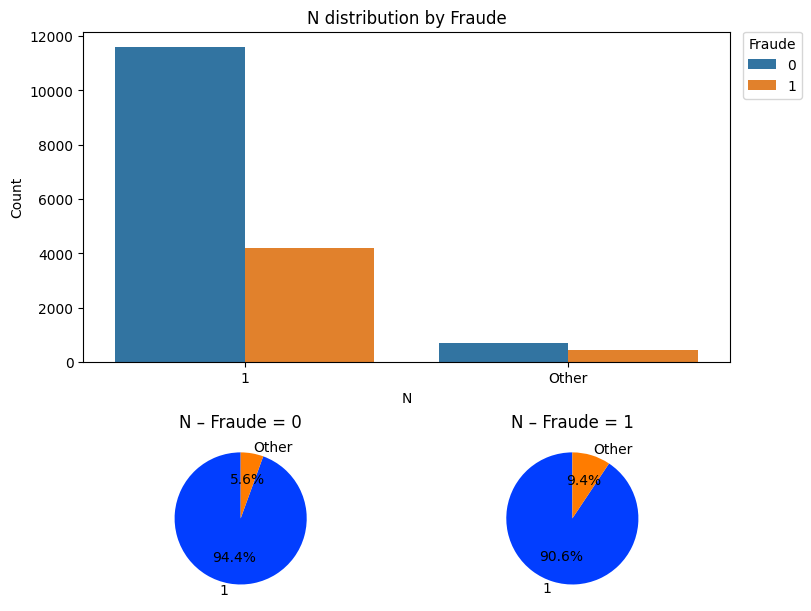

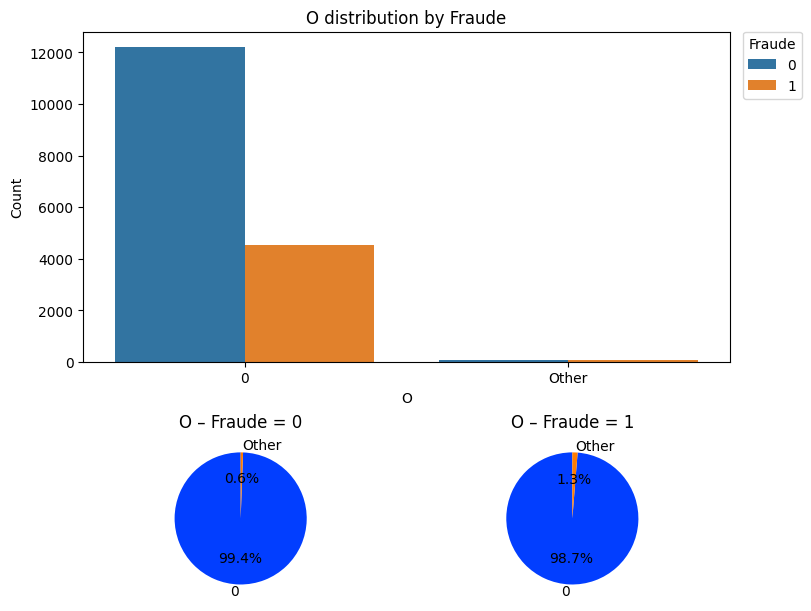

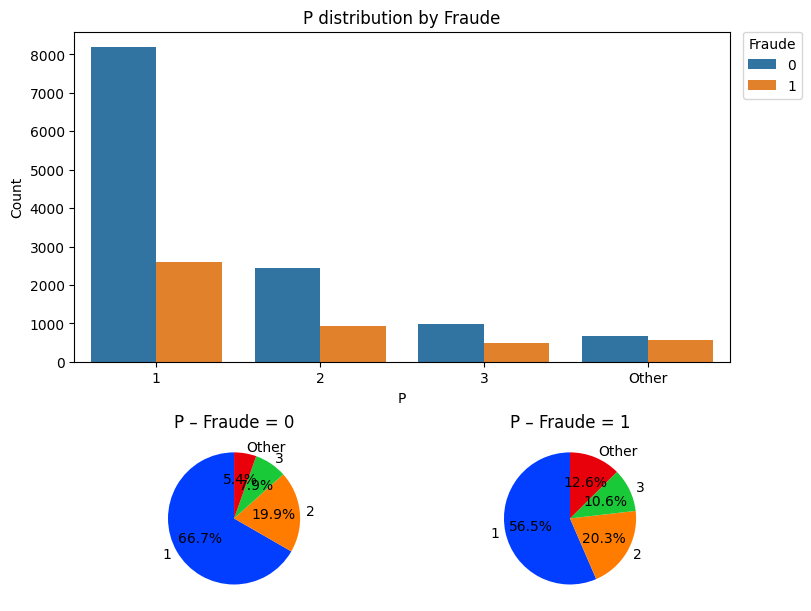

In [17]:
fraud_col = 'Fraude'
group_others = True
others_threshold = 0.05

df = data.copy()
df[fraud_col] = df[fraud_col].astype('category')

def label_na(series):
    return series.astype('object').where(~series.isna(), '<NA>')

def group_small_categories(df_, col, threshold):
    freqs = df_[col].value_counts(dropna=False, normalize=True)
    small = set(freqs[freqs < threshold].index)
    if small:
        df_[col] = df_[col].apply(lambda x: 'Other' if x in small else x)
    return df_

for col in ['A', 'B', 'D', 'E', 'H', 'I', 'L', 'M', 'N', 'O', 'P']:

    tmp = df[[col, fraud_col]].copy()
    tmp[col] = label_na(tmp[col])

    if group_others:
        tmp = group_small_categories(tmp, col, others_threshold)

    order_cat = tmp[col].value_counts(dropna=False).index.tolist()
    fraud_order = sorted(tmp[fraud_col].dropna().unique().tolist())

    fig = plt.figure(figsize=(8, 6), constrained_layout=True)
    gs = GridSpec(2, 2, height_ratios=[2, 1], figure=fig)
    ax_bar = fig.add_subplot(gs[0, :])
    ax_pie1 = fig.add_subplot(gs[1, 0])
    ax_pie2 = fig.add_subplot(gs[1, 1])

    sns.countplot(data=tmp, x=col, hue=fraud_col, order=order_cat,
                  hue_order=fraud_order if fraud_order else None, ax=ax_bar)
    ax_bar.set_title(f"{col} distribution by {fraud_col}")
    ax_bar.set_xlabel(col)
    ax_bar.set_ylabel("Count")
    ax_bar.legend(title=fraud_col, bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0)

    if len(order_cat) > 6:
        ax_bar.set_xticklabels(ax_bar.get_xticklabels(), rotation=45, ha='right')

    class_values = fraud_order if fraud_order else tmp[fraud_col].unique().tolist()
    pie_axes = [ax_pie1, ax_pie2][:len(class_values)]

    for ax, cls in zip(pie_axes, class_values):
        subset = tmp[tmp[fraud_col] == cls][col]
        vc = subset.value_counts(dropna=False).reindex(order_cat, fill_value=0)
        colors = sns.color_palette('bright')[0:len(order_cat)]
        ax.pie(vc.values, labels=order_cat, autopct='%1.1f%%',
               startangle=90, colors=colors)
        ax.set_title(f"{col} – {fraud_col} = {cls}")

    if len(class_values) == 1:
        ax_pie2.axis('off')

    plt.show()


for most of the plots the difference in the distribution between fraud and non-fraud is minimal, for now the decision is to keep all these features. However, a selection process such as mRMR or another method will ultimately determine which variables contribute the most to the prediction.

Now with the numeric values:

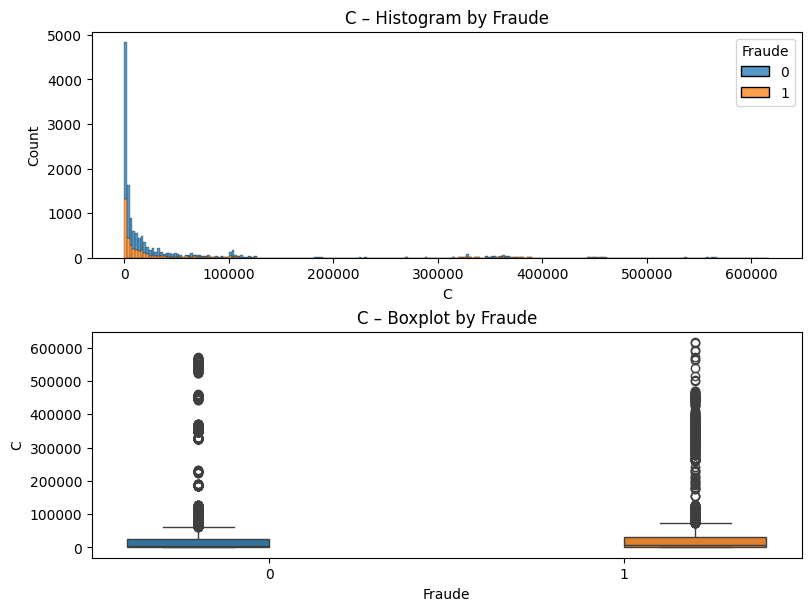

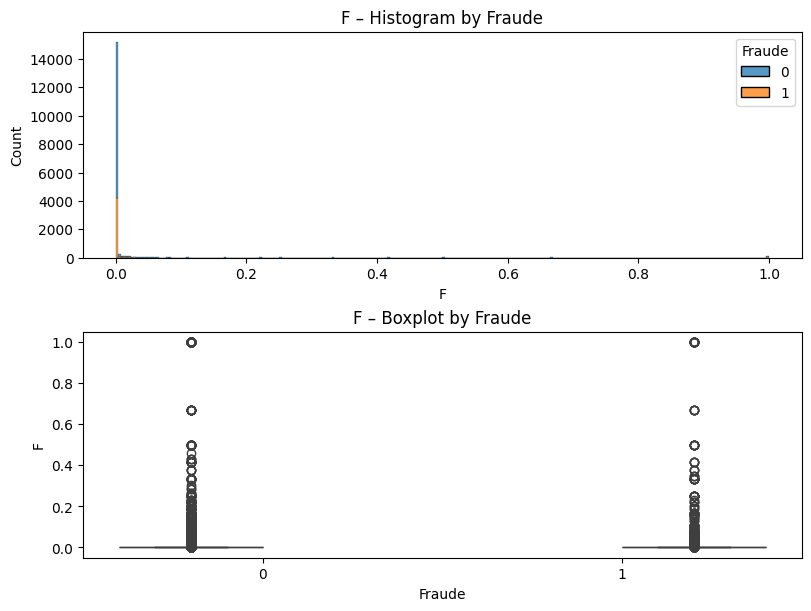

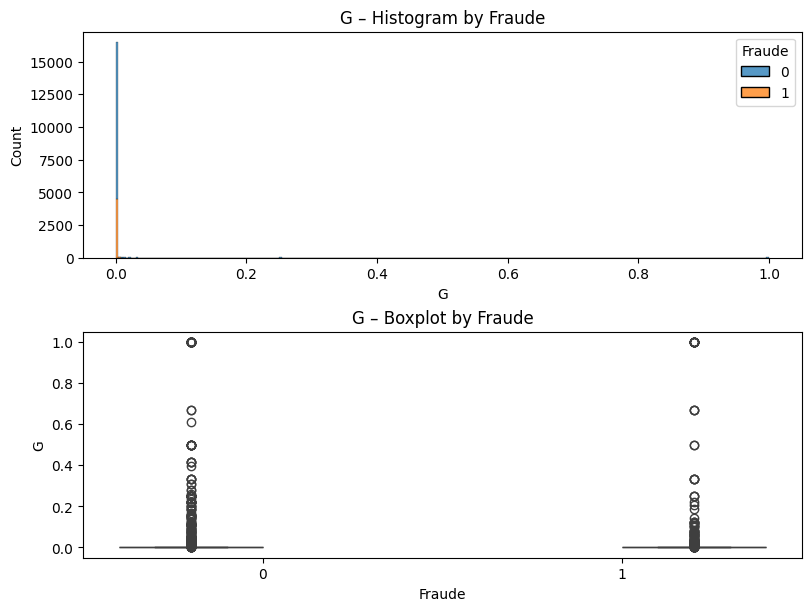

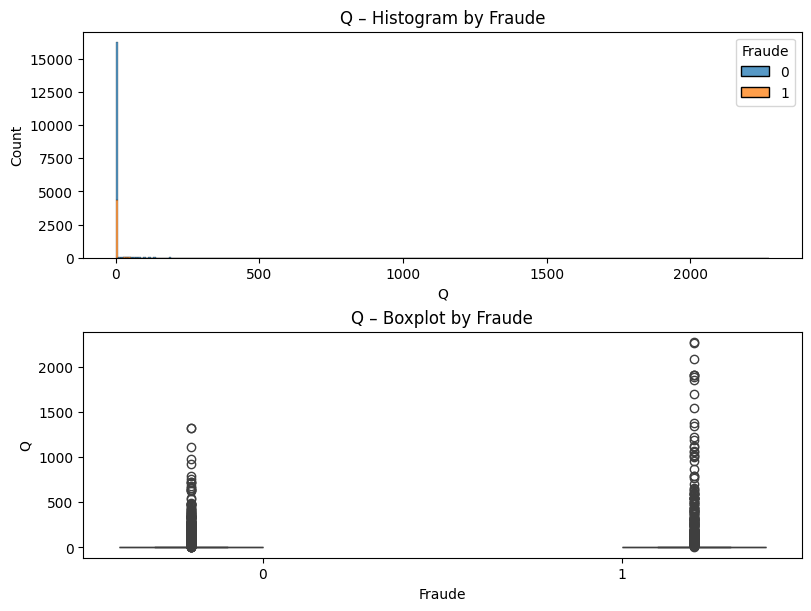

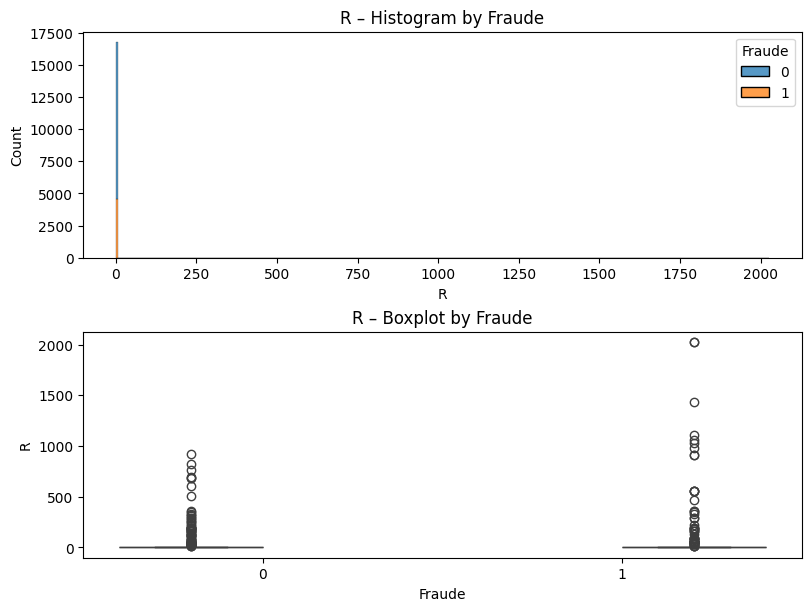

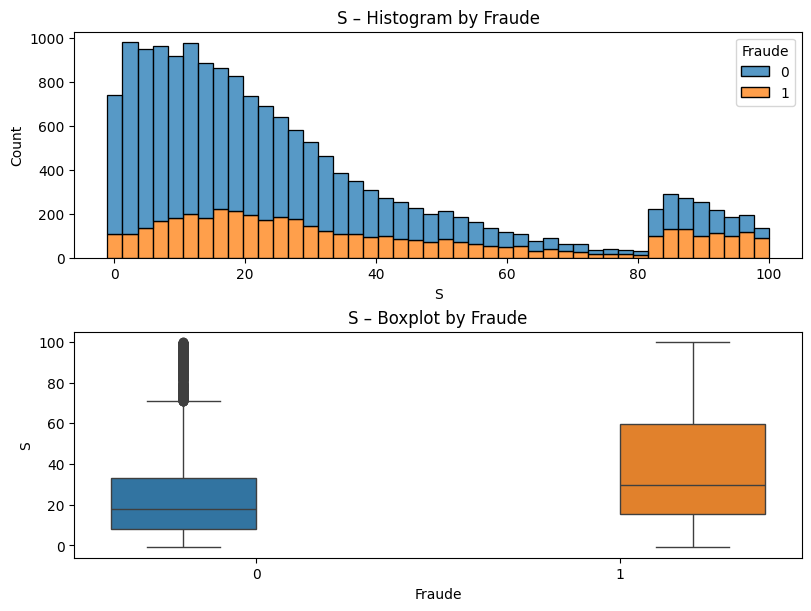

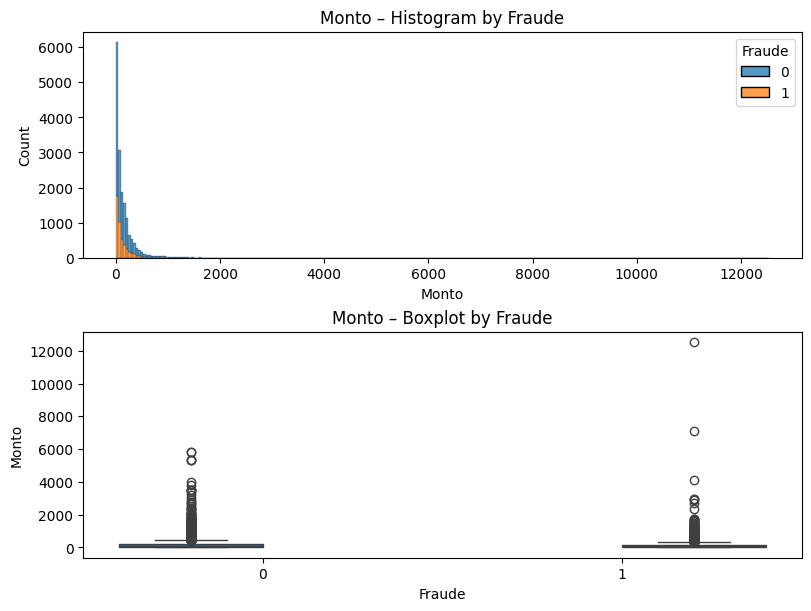

In [18]:

category_col = 'Fraude'

for col in ['C', 'F', 'G', 'Q', 'R', 'S', 'Monto']:

    fig, axes = plt.subplots(2, 1, figsize=(8, 6), constrained_layout=True)

    sns.histplot(
        data=data,
        x=col,
        hue=category_col,
        multiple='stack',
        ax=axes[0]
    )
    axes[0].set_title(f"{col} – Histogram by {category_col}")

    sns.boxplot(
        data=data,
        x=category_col,
        y=col,
        hue=category_col,
        dodge=True,
        ax=axes[1]
    )
    axes[1].set_title(f"{col} – Boxplot by {category_col}")
    axes[1].legend_.remove()

    plt.show()


In other types of classification problems, the presence of these outliers would normally be an issue, but based on what has been observed, in some situations they may actually be an indicator of fraud.

/tmp/ipykernel_21156/3751763005.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')


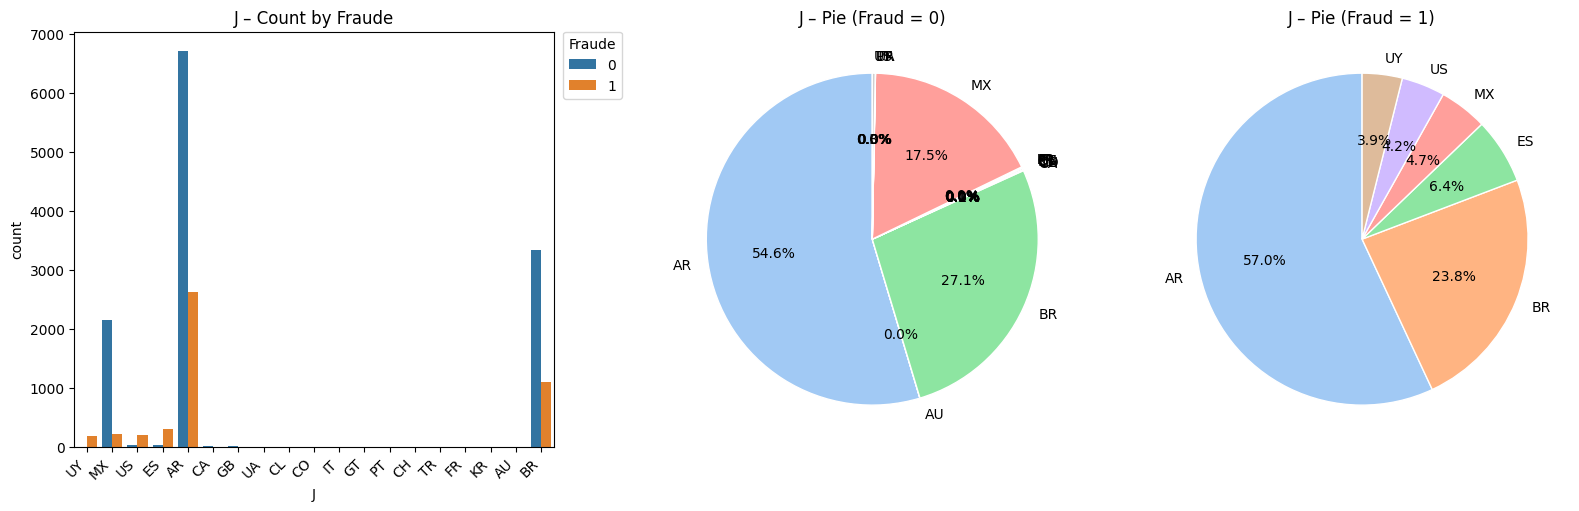

In [25]:
col = 'J'
category_col = 'Fraude'

fig, axes = plt.subplots(1, 3, figsize=(16, 5), constrained_layout=True)

sns.countplot(data=data, x=col, hue=category_col, ax=axes[0])
axes[0].set_title(f"{col} – Count by {category_col}")
axes[0].legend(title=category_col, bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')

classes = sorted(data[category_col].dropna().unique())
colors = sns.color_palette('pastel')

for i, cls in enumerate(classes):
    subset = data[data[category_col] == cls][col]
    counts = subset.value_counts().sort_index()
    axes[i + 1].pie(
        counts.values,
        labels=counts.index,
        autopct='%1.1f%%',
        colors=colors[:len(counts)],
        startangle=90,
        wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
    )
    axes[i + 1].set_title(f"{col} – Pie (Fraud = {cls})")

plt.show()